In [1]:
import pandas as pd
data_dir = "/home/juan/Desktop/juan/bio/mirna_mrcv/data/"
res_dir = "/home/juan/Desktop/juan/bio/mirna_mrcv/data/"

## tr -s '\t' '\t' < Counts.txt > counts.fixed.csv

In [14]:
path_counts = data_dir + "counts.fixed.csv"
df_counts = pd.read_csv(path_counts, sep="\t", comment='#')


In [15]:
df_counts.head(2)

,Locus,Name,main,21dpiR1C.trimmed,21dpiR3C.trimmed,21dpiR1T.trimmed,21dpiR3T.trimmed
0,1A:209-460,Cluster_1,118,23,20,45,30
1,1A:690-750,Cluster_2,78,17,4,32,25


In [16]:
print(len(df_counts.index))

120976


In [17]:
path_results = data_dir + "Results.txt"
df_res = pd.read_csv(path_results, sep="\t")
df_res.head(2)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24
0,1A:209-460,Cluster_1,252,118,0.926,64,1.0,+,CGCGGAUUGCUCGAGCUGCUCACGCGGCGAGAGCGGGUCG,25,...,N,N2,-1.0,28,71,2,1,6,6,4
1,1A:690-750,Cluster_2,61,78,0.612,0,1.0,+,UAGACCGACUUUGUGAAAUG,5,...,N,N2,-1.0,7,54,7,0,1,2,7


In [18]:
print(len(df_res.index))

38532


In [19]:
df_res = df_res[df_res.MIRNA == "Y"]
print(len(df_res.index))

135


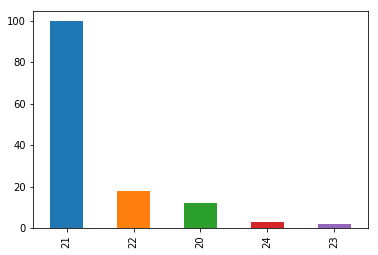

In [20]:
df_res.DicerCall.value_counts().plot('bar')

In [21]:
df_res['seqname'] = df_res['#Locus'].str.split(':').str[0]
df_res['position'] = df_res['#Locus'].str.split(':').str[1]
df_res['start'] = df_res.position.str.split('-').str[0].astype(int)
df_res['end'] = df_res.position.str.split('-').str[1].astype(int)


In [22]:
df_res[(df_res.start - df_res.end) > 250]

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,Long,20,21,22,23,24,seqname,position,start,end


In [23]:
valids = df_res.Name.unique().tolist()
df_counts = df_counts[df_counts.Name.isin(valids)]

In [24]:
df_counts.to_csv(res_dir + 'counts.valid.csv', sep="\t", index=None)